# Importing Packages & Files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.mixture import GaussianMixture

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

In [ ]:
bankchurners = 'BankChurners.csv'

df = pd.read_csv(bankchurners)

# EDA

## Data Cleaning

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Visualising the Distribution of Features

### Numerical Features

#### Customer Attributes

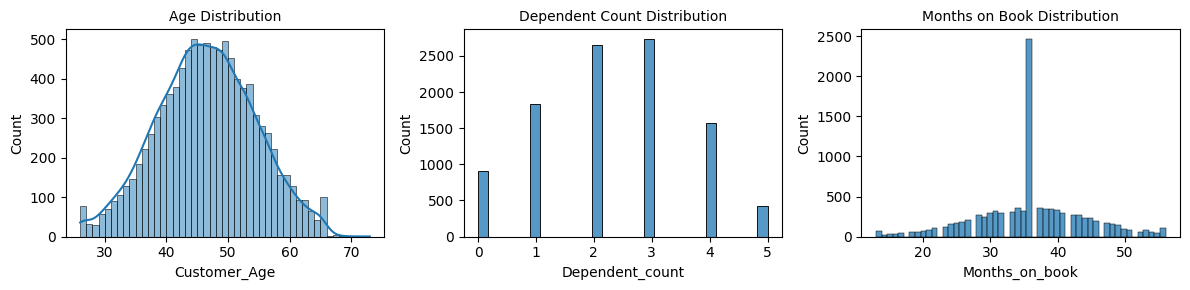

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Plot Age Distribution
sns.histplot(df['Customer_Age'], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution", fontsize=10)

# Plot Dependent Count Distribution
sns.histplot(df['Dependent_count'], ax=axes[1])
axes[1].set_title("Dependent Count Distribution", fontsize=10)

# Plot Months_on_book Distribution
sns.histplot(x=df['Months_on_book'], ax=axes[2])
axes[2].set_title("Months on Book Distribution", fontsize=10)


# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

#### Transactional Data

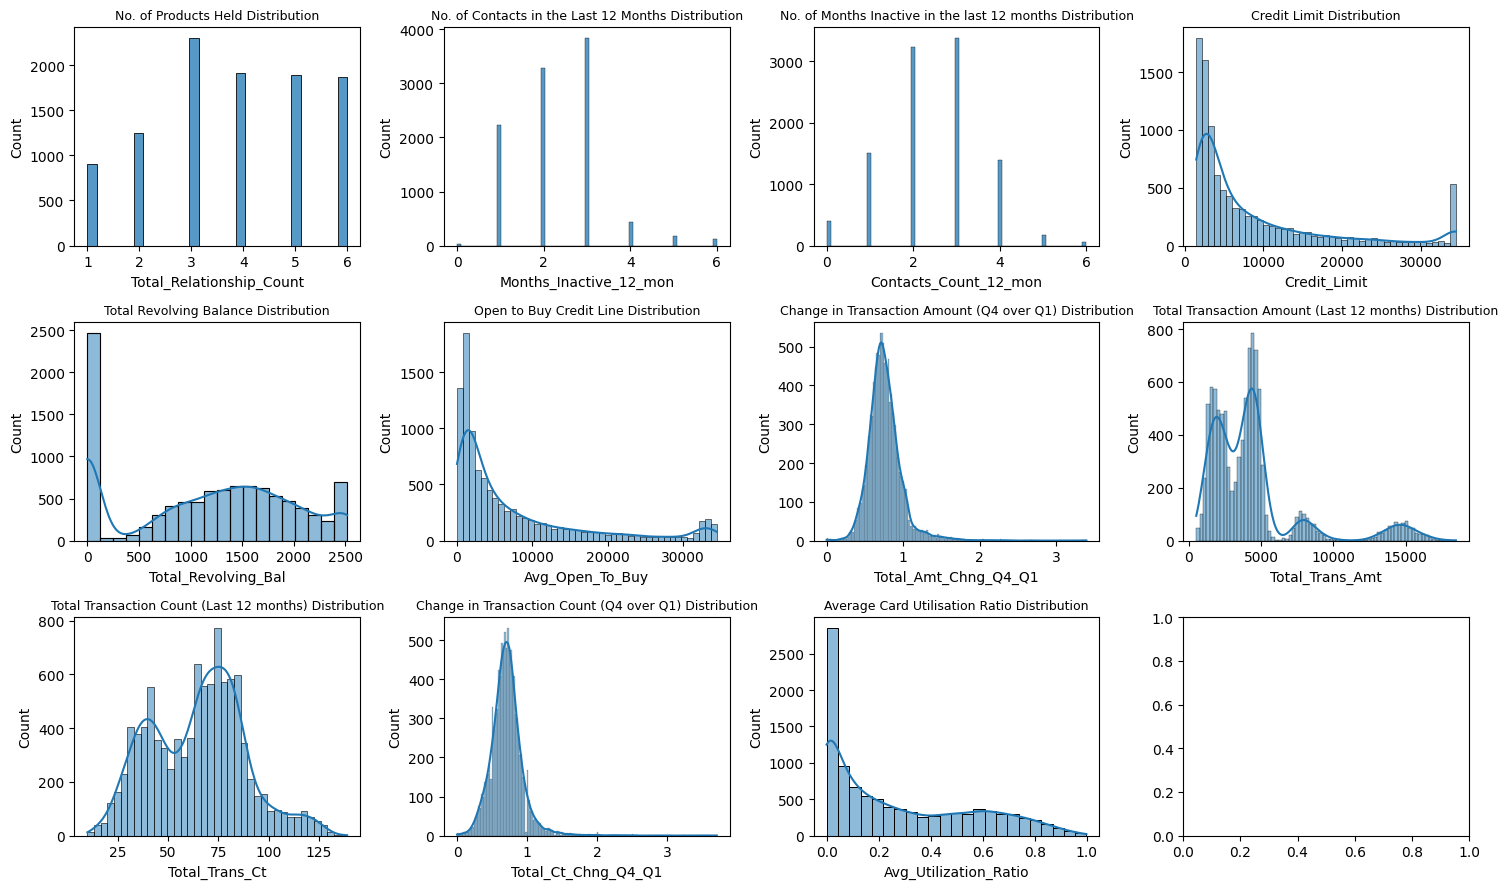

In [ ]:
# Create a figure with 3 row and 4 columns
fig, axes = plt.subplots(3, 4, figsize=(15, 9))

# Plot Total_Relationship_Count Distribution
sns.histplot(df['Total_Relationship_Count'], ax=axes[0,0])
axes[0,0].set_title("No. of Products Held Distribution", fontsize=9)

# Plot Months_Inactive_12_mon Distribution
sns.histplot(df['Months_Inactive_12_mon'], ax=axes[0,1])
axes[0,1].set_title("No. of Contacts in the Last 12 Months Distribution", fontsize=9)

# Plot Contacts_Count_12_mon Distribution
sns.histplot(x=df['Contacts_Count_12_mon'], ax=axes[0,2])
axes[0,2].set_title("No. of Months Inactive in the last 12 months Distribution", fontsize=9)

# Plot Credit_Limit Distribution
sns.histplot(df['Credit_Limit'], kde=True, ax=axes[0,3])
axes[0,3].set_title("Credit Limit Distribution", fontsize=9)

# Plot Total_Revolving_Bal Distribution
sns.histplot(df['Total_Revolving_Bal'], kde=True, ax=axes[1,0])
axes[1,0].set_title("Total Revolving Balance Distribution", fontsize=9)

# Plot Avg_Open_To_Buy Distribution
sns.histplot(x=df['Avg_Open_To_Buy'], kde=True, ax=axes[1,1])
axes[1,1].set_title("Open to Buy Credit Line Distribution", fontsize=9)

# Plot Total_Amt_Chng_Q4_Q1 Distribution
sns.histplot(df['Total_Amt_Chng_Q4_Q1'], kde=True, ax=axes[1,2])
axes[1,2].set_title("Change in Transaction Amount (Q4 over Q1) Distribution", fontsize=9)

# Plot Total_Trans_Amt Distribution
sns.histplot(x=df['Total_Trans_Amt'], kde=True, ax=axes[1,3])
axes[1,3].set_title("Total Transaction Amount (Last 12 months) Distribution", fontsize=9)

# Plot Total_Trans_Ct Distribution
sns.histplot(x=df['Total_Trans_Ct'], kde=True, ax=axes[2,0])
axes[2,0].set_title("Total Transaction Count (Last 12 months) Distribution", fontsize=9)

# Plot Total_Ct_Chng_Q4_Q1 Distribution
sns.histplot(df['Total_Ct_Chng_Q4_Q1'], kde=True, ax=axes[2,1])
axes[2,1].set_title("Change in Transaction Count (Q4 over Q1) Distribution", fontsize=9)

# Plot Avg_Utilization_Ratio Distribution
sns.histplot(x=df['Avg_Utilization_Ratio'], kde=True, ax=axes[2,2])
axes[2,2].set_title("Average Card Utilisation Ratio Distribution", fontsize=9)


# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

### Categorical Features

#### Customer Attributes

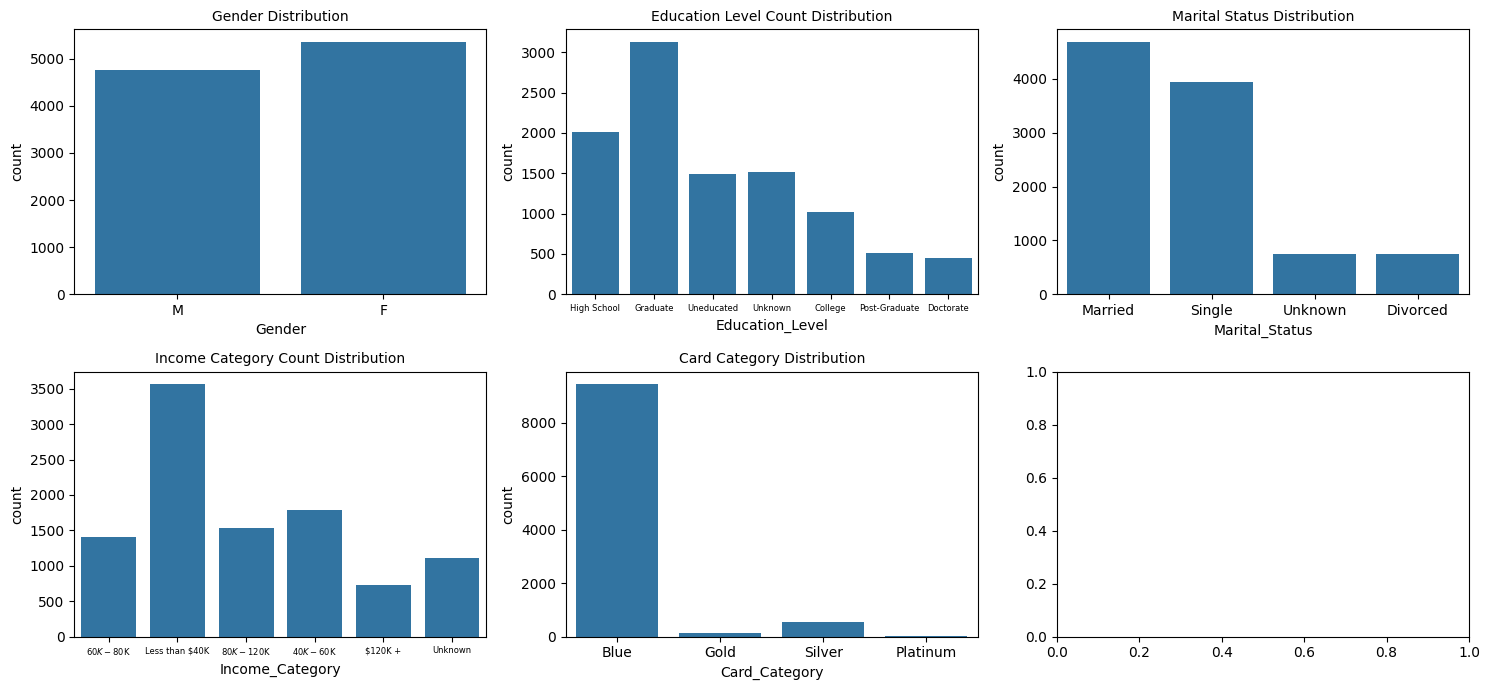

In [ ]:
# Create a figure with 2 row and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

# Plot Gender Distribution
sns.countplot(x=df['Gender'], ax=axes[0, 0])
axes[0, 0].set_title("Gender Distribution", fontsize=10)

# Plot Education Level Count Distribution
sns.countplot(x=df['Education_Level'], ax=axes[0, 1])
axes[0, 1].set_title("Education Level Count Distribution", fontsize=10)
axes[0, 1].tick_params(axis='x', labelsize=6)

# Plot Marital_Status Distribution
sns.countplot(x=df['Marital_Status'], ax=axes[0, 2])
axes[0, 2].set_title("Marital Status Distribution", fontsize=10)

# Plot Income Category Distribution
sns.countplot(x=df['Income_Category'], ax=axes[1, 0])
axes[1, 0].set_title("Income Category Count Distribution", fontsize=10)
axes[1, 0].tick_params(axis='x', labelsize=6)

# Plot Card_Category Distribution
sns.countplot(x=df['Card_Category'], ax=axes[1, 1])
axes[1, 1].set_title("Card Category Distribution", fontsize=10)


# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()